In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv')

In [3]:
df

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961
...,...,...,...,...,...,...,...,...,...
11079,11080,The Band Perry,If I Die Young,1,0.0,184,0,51321,51321
11080,11081,Justin Timberlake,Not a Bad Thing,1,0.0,196,0,49512,49512
11081,11082,Mike WiLL Made,It 23,1,0.0,167,0,46547,46547
11082,11083,The Vamps,Somebody To You,1,0.0,200,0,44962,44962


In [4]:
df.dtypes

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)     object
Peak Streams                int64
Total Streams               int64
dtype: object

In [5]:
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

In [6]:
df.dropna()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961
...,...,...,...,...,...,...,...,...,...
11079,11080,The Band Perry,If I Die Young,1,0.0,184,0,51321,51321
11080,11081,Justin Timberlake,Not a Bad Thing,1,0.0,196,0,49512,49512
11081,11082,Mike WiLL Made,It 23,1,0.0,167,0,46547,46547
11082,11083,The Vamps,Somebody To You,1,0.0,200,0,44962,44962


In [23]:
df['Peak Position (xTimes)'] = df['Peak Position (xTimes)'].replace("[^0-9]", '', regex=True).astype('int')
df['Song Name'] = df['Song Name'].replace("[^a-zA-Z]", '', regex=True)

In [24]:
df.dtypes

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)      int64
Peak Streams                int64
Total Streams               int64
dtype: object

In [25]:
df['Artist Name'] = df['Artist Name'].replace('[^a-zA-Z]', '', regex=True)

<AxesSubplot:>

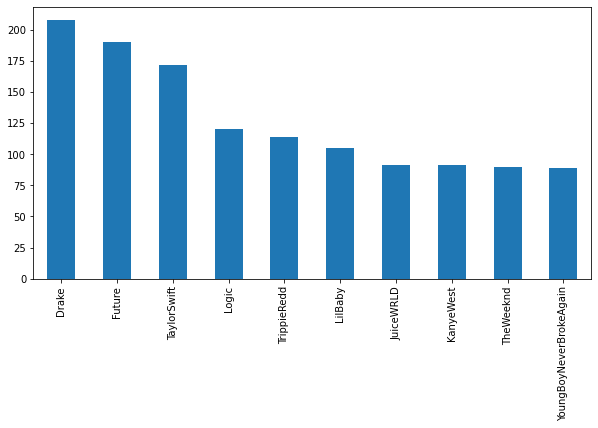

In [26]:
# top 10 artist name and total songs by artist
plt.figure(figsize=(10,5))
df['Artist Name'].value_counts().head(10).plot(kind="bar")

<AxesSubplot:>

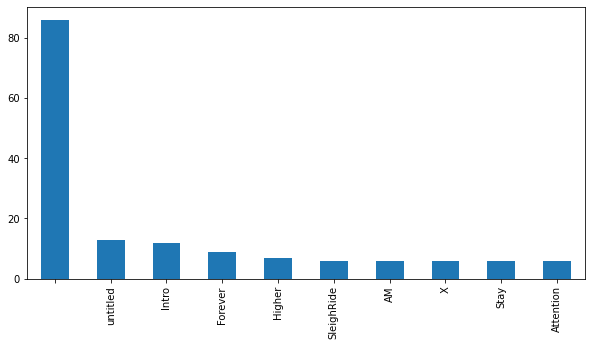

In [27]:
#song name 
plt.figure(figsize=(10,5))
df['Song Name'].value_counts().head(10).plot(kind="bar")

<AxesSubplot:xlabel='Artist Name'>

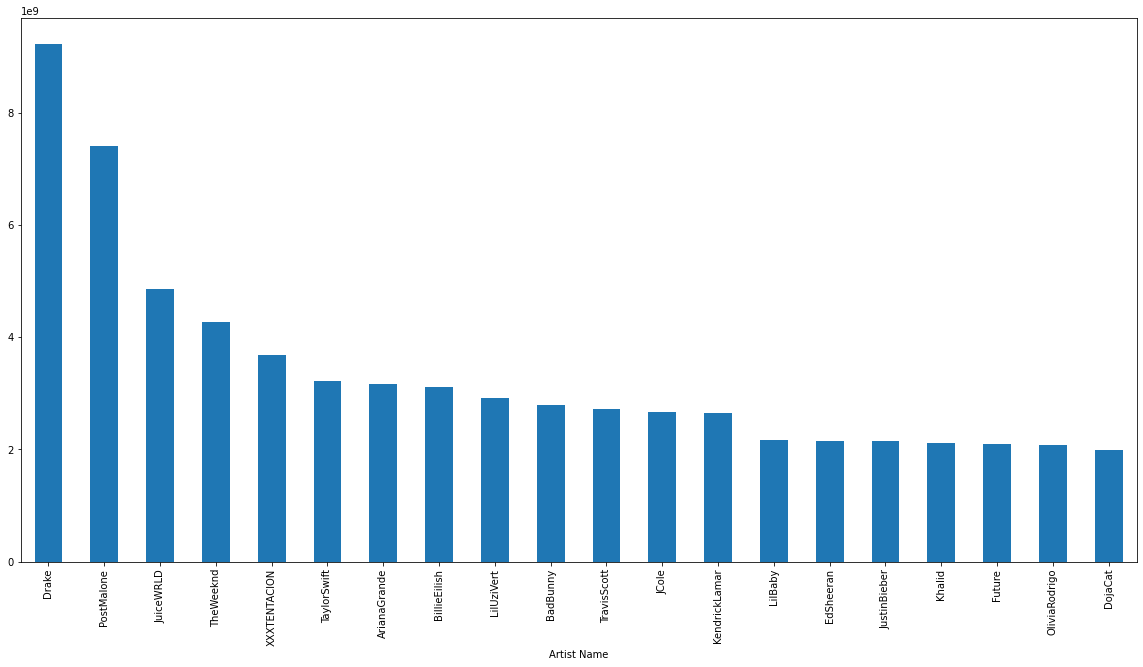

In [28]:
# Total streams by artist
plt.figure(figsize=(20,10))
df.groupby(['Artist Name'])['Total Streams'].sum().sort_values(ascending=False).head(20).plot(kind="bar")

<AxesSubplot:xlabel='Song Name', ylabel='Total Streams'>

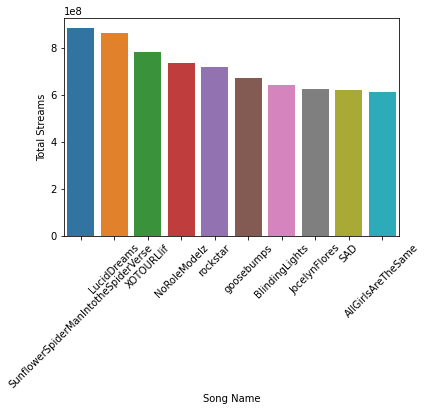

In [40]:
# top 10 most streamed song
df_streams_srt = df.sort_values(by=['Total Streams'], ascending=False).head(10)
plt.xticks(rotation = 45)
sns.barplot(data=df_streams_srt, x='Song Name', y = 'Total Streams')

<AxesSubplot:xlabel='Artist Name'>

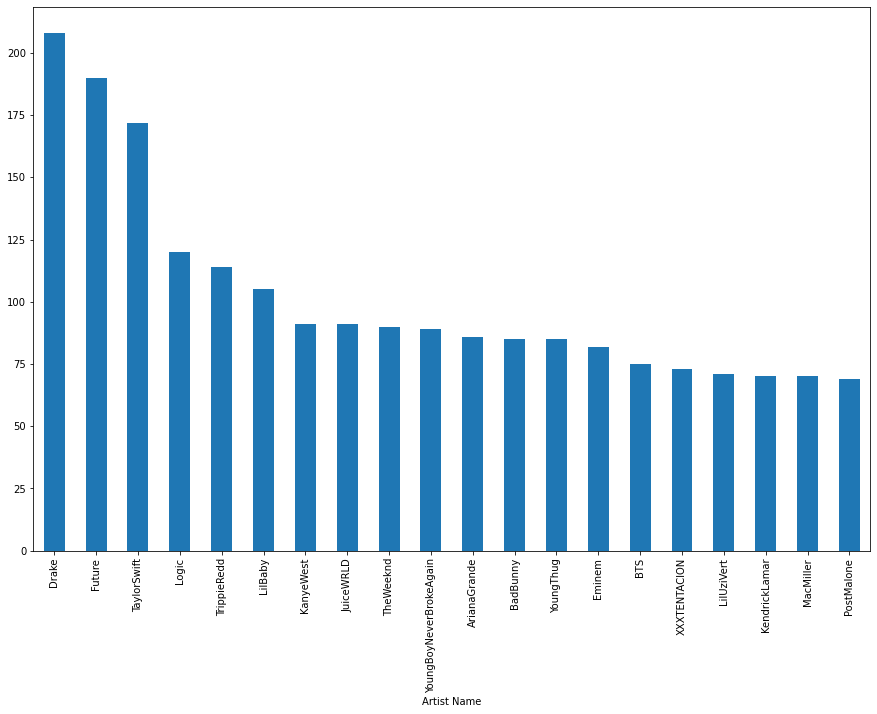

In [14]:
# no of song of artist in data
plt.figure(figsize=(15,10))
df.groupby(['Artist Name'])['Artist Name'].count().sort_values(ascending=False).head(20).plot(kind="bar")

In [15]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

<AxesSubplot:xlabel='Artist Name', ylabel='COUNT(*)'>

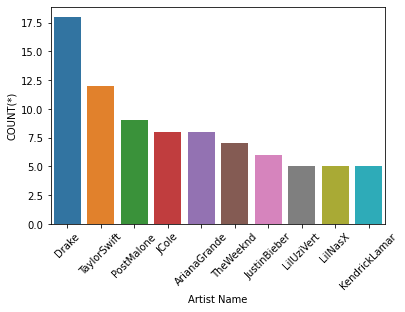

In [41]:
# no of song at rank 1 of artist
q = """ SELECT [Artist Name], COUNT(*) FROM df 
        WHERE [Peak Position] = 1
        GROUP BY [Artist Name]
        ORDER BY COUNT(*) Desc
        LIMIT 10"""
values = sqldf(q)
plt.xticks(rotation = 45)
sns.barplot(data=values, x='Artist Name', y = 'COUNT(*)')


<AxesSubplot:xlabel='Peak Position', ylabel='Total Streams'>

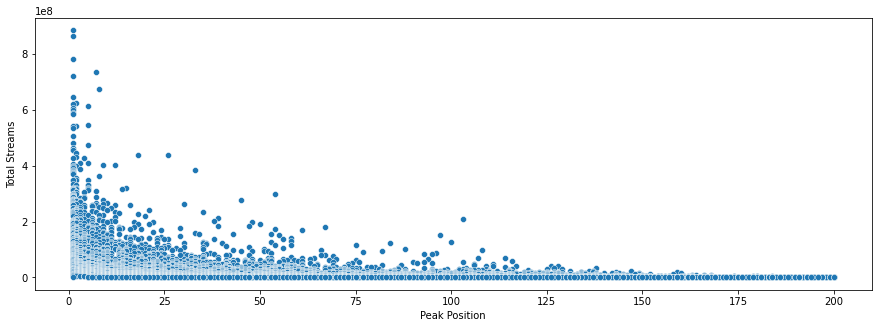

In [17]:
# peak position vs steam
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='Peak Position', y='Total Streams')

<AxesSubplot:>

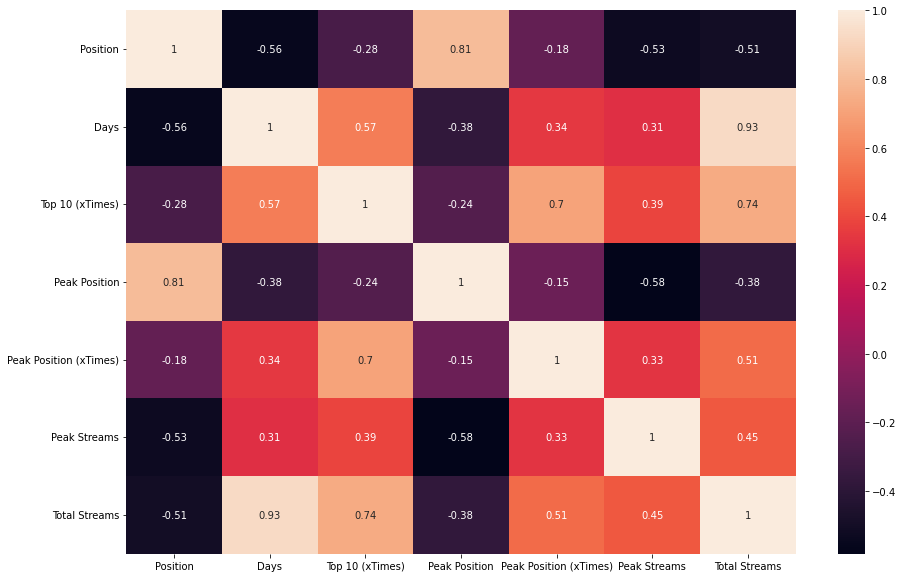

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)